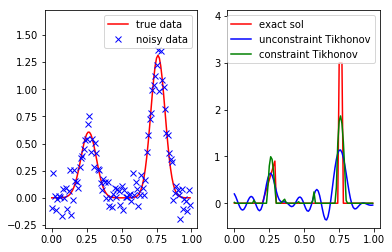

relative error minimize: 0.0885


step1:relative error: 23.6144

step2:relative error: 17.5861

step3:relative error: 15.2141

step4:relative error: 10.5920

step5:relative error: 1.6066

step6:relative error: 1.2707

step7:relative error: 0.0000



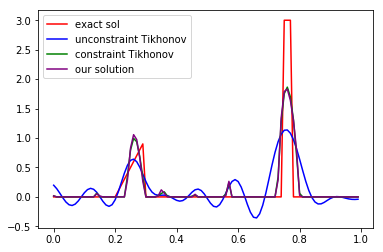

In [1]:
%matplotlib inline

import numpy as np
import numpy.linalg
import scipy.linalg
import scipy.optimize
import matplotlib.pyplot as plt

# Create a blur matrix T
n = 100
x = np.arange(n) / n
h = np.exp(-x*x/0.005)
h = h / np.sum(h)
T = scipy.linalg.toeplitz(h)



# Create a true solution and an exact right hand side
f = np.zeros((n,))
f[20:30] = np.arange(10)/10
f[75:78] = np.array([3 , 3 , 3])
gdag = T.dot(f)

gdel = gdag + 0.1*np.random.randn(n)


alpha1 = 1e-2
alpha2 = 1e-3

fhat1 = scipy.linalg.solve(T.transpose().dot(T) + alpha1*np.eye(n) , T.transpose().dot(gdel) )

initial_guess = 0*f
cons = ({'type':'ineq', 'fun':lambda x: x})
res = scipy.optimize.minimize(lambda z: 1/2 *(alpha2* z.transpose().dot(z) + z.transpose().dot(T.transpose().dot(T).dot(z))) - T.transpose().dot(gdel).dot(z), initial_guess,constraints=cons)
fhat2 = res.x 

plt.subplot(121)
plt.plot(x,gdag,label="true data", color="red")
plt.plot(x,gdel,label="noisy data", color="blue",linestyle="",marker="x")
ymin, ymax = plt.ylim()
plt.ylim(ymin, ymax*1.2)
plt.legend()

plt.subplot(122)
plt.plot(x,f,label="exact sol", color="red")
plt.plot(x,fhat1,label="unconstraint Tikhonov", color="blue")
plt.plot(x,fhat2,label="constraint Tikhonov", color="green")
ymin, ymax = plt.ylim()
plt.ylim(ymin, ymax*1.3)
plt.legend()
plt.show()

p = -(1/alpha2) * (T.dot(fhat2)-gdel)
err1 = np.maximum(T.transpose().dot(p),0*f)-fhat2
err2 = 2*np.maximum(-T.transpose().dot(p),0*f).transpose().dot(fhat2)
error = np.sqrt(numpy.linalg.norm(err1)**2 + err2)

print("relative error minimize: {:.4f}\n\n".format(error/numpy.linalg.norm(f)))

fhat3 = fhat2
#INSERT YOUR CODE HERE !!
p = gdag
p2 = p
j = 0
while error > 1e-10 and j<=20:
    j = j+1
    D = 1*np.diag(T.transpose().dot(p)>=0)
    p = scipy.linalg.solve(T.dot(D.dot(T.transpose())) + alpha2*np.eye(n) , gdel )
    fhat3 = np.maximum(T.transpose().dot(p),0*f)
    p2 = -(1/alpha2) * (T.dot(fhat3)-gdel)
    err1 = np.maximum(T.transpose().dot(p2),0*f)-fhat3
    err2 = 2*np.maximum(-T.transpose().dot(p2),0*f).transpose().dot(fhat3)
    error = np.sqrt(numpy.linalg.norm(err1)**2 + err2)
    print("step{}:relative error: {:.4f}\n".format(j,error/numpy.linalg.norm(f)))
    

plt.plot(x,f,label="exact sol", color="red")
plt.plot(x,fhat1,label="unconstraint Tikhonov", color="blue")
plt.plot(x,fhat2,label="constraint Tikhonov", color="green")
plt.plot(x,fhat3,label="our solution", color="purple")
plt.legend(loc='upper left')
plt.show()



